In [5]:
# import necessary modules
import mpd
import numpy as np
np.random.seed(20211121)

In [7]:
# generate true set and compute persistent homology
# this step takes about 4 mins.
X_torus = mpd.sample_torus(50000, 0.8, 0.3)
np.save('data/true-torus-points.npy', X_torus)
diag_torus = mpd.get_PD(X_torus, max_edge_length=1)
np.save('data/true-torus-diagram.npy', diag_torus)

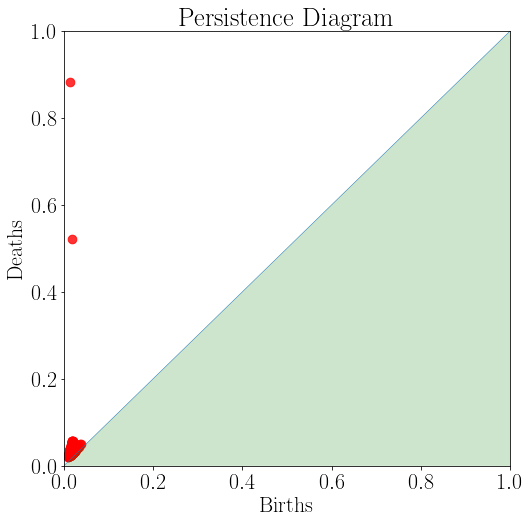

In [3]:
# visualize the true persistence diagram
# use the following command if you have true-torus-diagram prepared 
# diag_torus = np.load('data/true-torus-diagram.npy')
mpd.plot_diag(diag_torus)

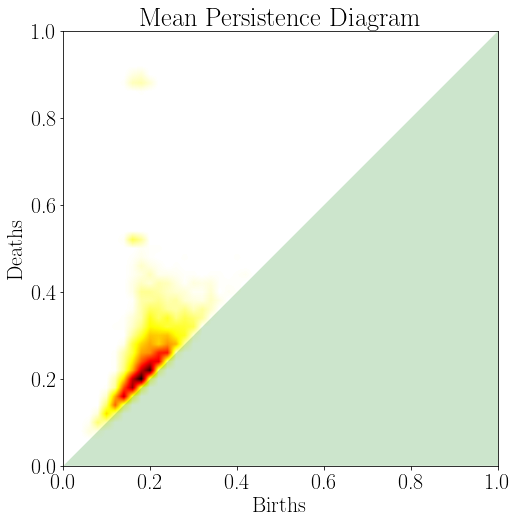

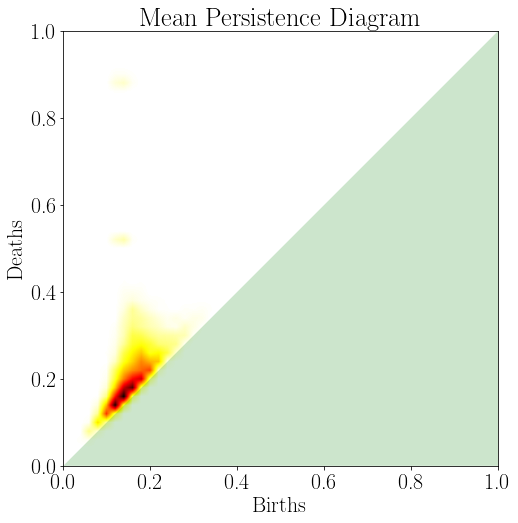

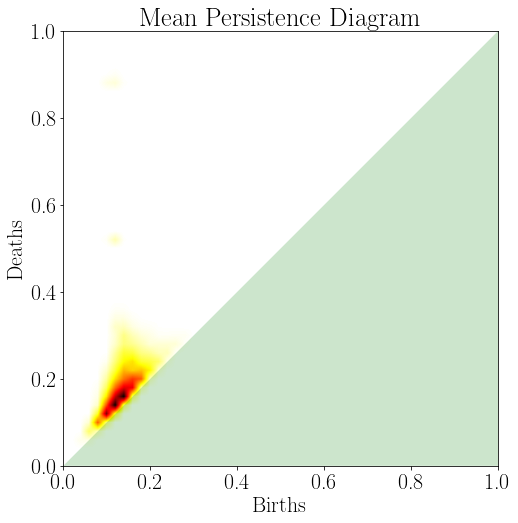

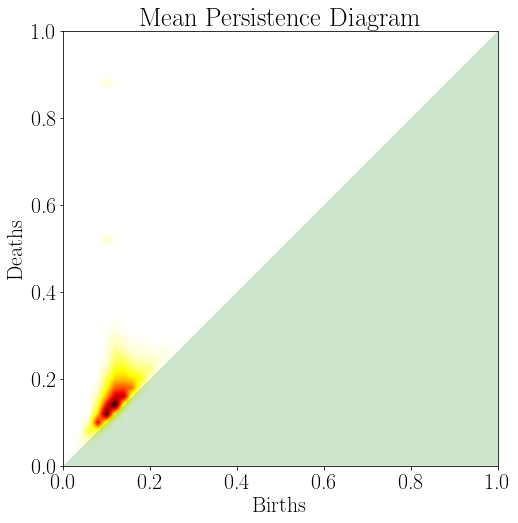

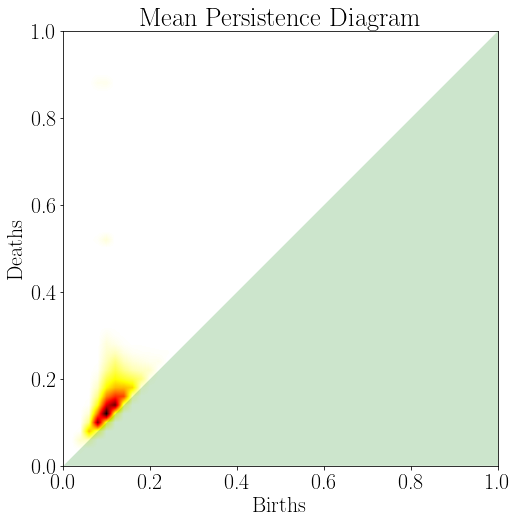

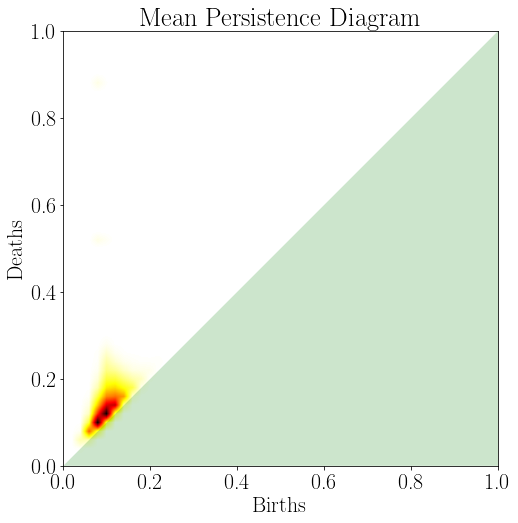

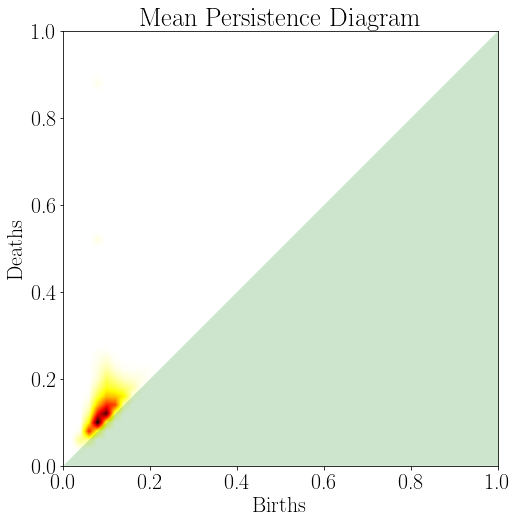

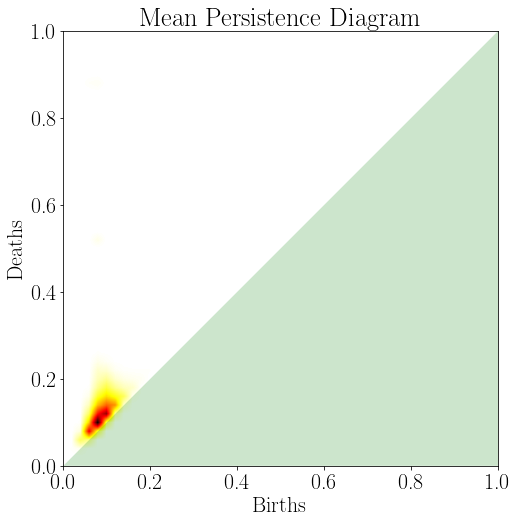

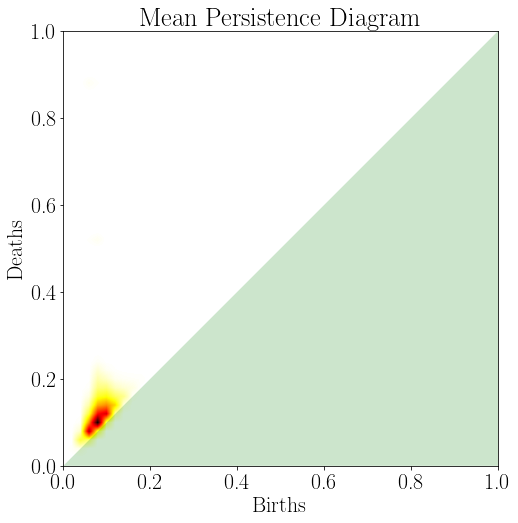

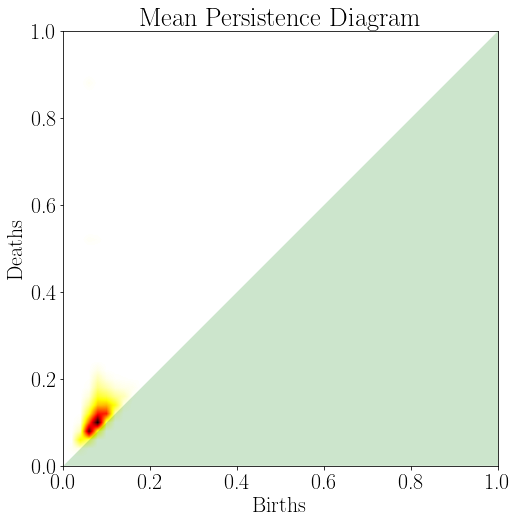

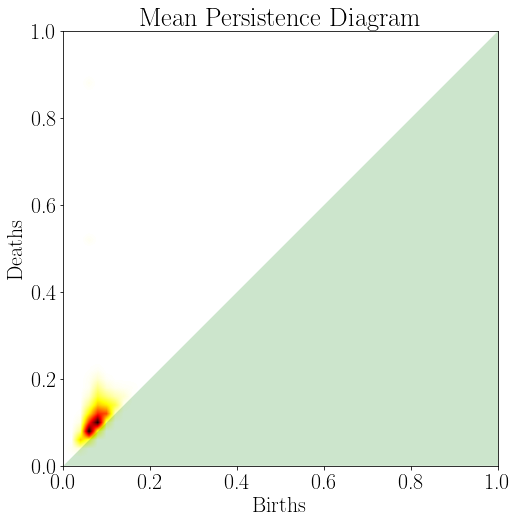

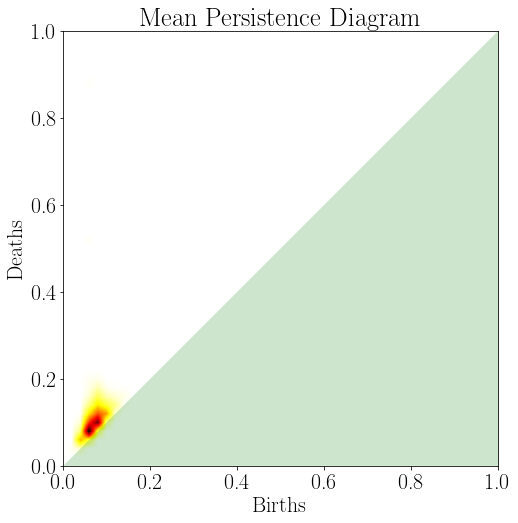

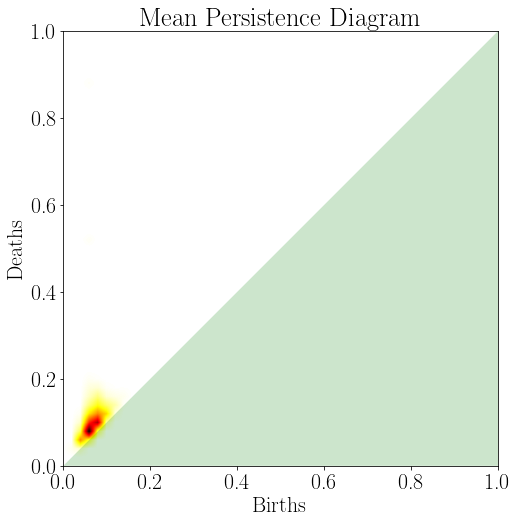

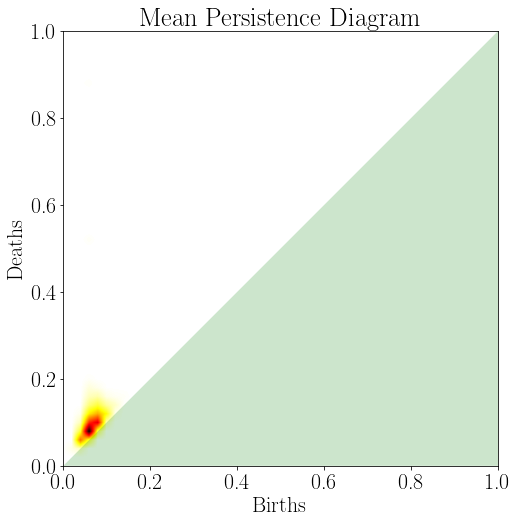

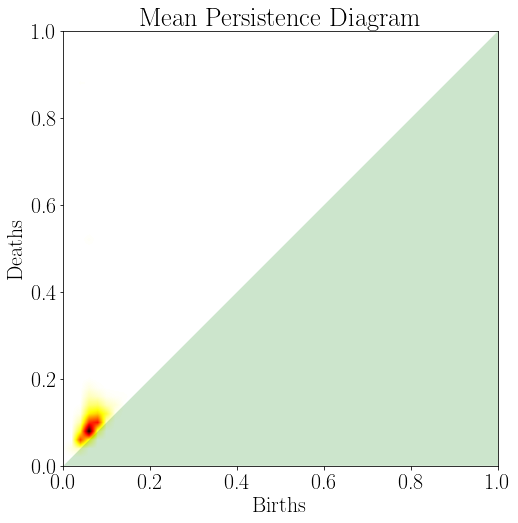

In [6]:
# extract subsamples from the true set
# use the following command if you have true-torus-points prepared
# X_torus = np.load('data/true-torus-points.npy')
# it takes about 7 hours to run 15 simulations
nb_simulates = 15
for i in range(nb_simulates):
    # list of subsets
    nb_subs = 20*(i+2)
    nb_sub_points = 200*(i+2)
    subs = mpd.get_subsample(X_torus, nb_sub_points, nb_subs)
    # list of PDs
    diags = np.array([[0,0]])
    for points in subs:
        diag = mpd.get_PD(points, max_edge_length=1)
        diag[np.isinf(diag)] = 1
        diags = np.append(diags, diag, axis=0)
    # compute mean persistence measure
    unit_mass = 1/nb_subs
    mean_mesr, mean_mesr_vis = mpd.diag_to_mesr(diags, unit_mass)
    np.save('data/mean_mesr_nb%d.npy' %(i), mean_mesr)
    # visualize the mean persistence measure
    mpd.plot_mesr(mean_mesr_vis)

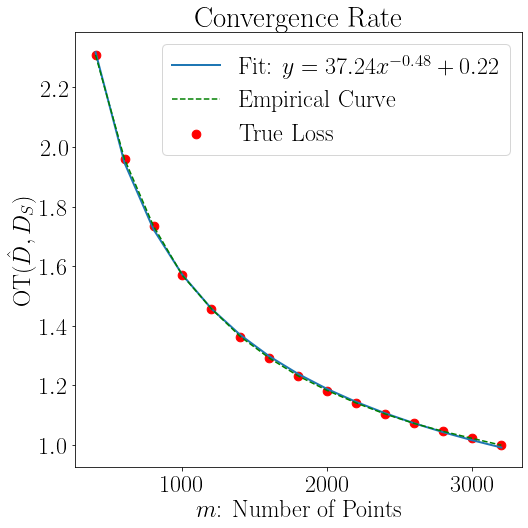

In [7]:
# compute Wasserstein distances between mean persistence measures
# and true persistence diagram
# use the following command if you the mean PMs prepared
mesr_list = []
for i in range(15):
    mesr = np.load('data/mean_mesr_nb%d.npy' %(i))
    mesr_list.append(mesr)

# load the true PD
true_PD = np.load('data/true-torus-diagram.npy')
# transform the true PD to PM
true_mesr, true_mesr_vis = mpd.diag_to_mesr(true_PD, 1)

# compute the Wasserstein distance
power_index = 3
grid = mpd.mesh_gen()
Mp = mpd.dist_mat(grid, power_index)
dist_list = []
point_list = []
for i in range(len(mesr_list)):
    distance = mpd.wass_dist(mesr_list[i], true_mesr, Mp)
    point_list.append(200*(i+2))
    dist_list += distance.tolist()
    
# plot fitting curve
mpd.plot_fitting_curve(point_list, dist_list)